<a href="https://colab.research.google.com/github/itzelgabrielaroquedelgado076-cell/Estad-stica2025B/blob/main/Galton_Family_Heights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/itzelgabrielaroquedelgado076-cell/Estad-stica2025B/refs/heads/main/Galton_Family_Heights.csv"

df=pd.read_csv(url)
df= df.dropna()

df

,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1
...,...,...,...,...
929,62.0,66.0,64.0,1
930,62.0,66.0,62.0,0
931,62.0,66.0,61.0,0
932,62.5,63.0,66.5,1


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Y~X
modelo_lineal = ols(
    'Child_height~Father_height+Mother_height+C(gender)',
    data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Si hay diferencia significactiva

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,6139.765860,6139.765860,1310.267599,9.746311e-180
Father_height,1.0,963.193438,963.193438,205.552000,2.883665e-42
Mother_height,1.0,491.865366,491.865366,104.967399,2.061354e-23
Residual,930.0,4357.874875,4.685887,NaN,NaN


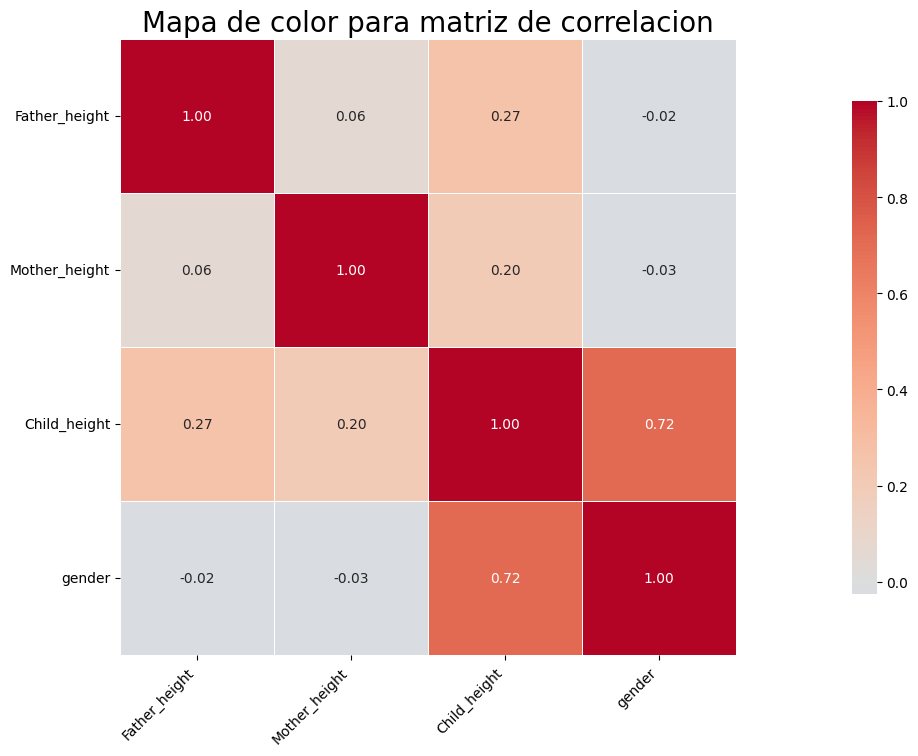

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion= df.corr()

plt.figure(figsize=(30,8), dpi= 100)

sns.heatmap(
    matriz_de_correlacion, #lo que va a graficar
    annot= True, #se muestran los valores en las celdas
    fmt= "0.2f", #0.2f significa "dos decimales"
    cmap= "coolwarm", #paleta de colores
    square= True, #forzar cuadrados
    linewidths= 0.5, #grosor de lineas
    cbar_kws= {"shrink":0.8}, #tamaño barra lateral
    center= 0,
    )

plt.title("Mapa de color para matriz de correlacion", fontsize=20)
plt.xticks(rotation= 45, ha= "right")
plt.yticks(rotation= 0)
plt.show()

In [ ]:
matriz_de_correlacion["gender"].sort_values()

,gender
Mother_height,-0.025216
Father_height,-0.024762
Child_height,0.716709
gender,1.000000


In [ ]:
matriz_de_correlacion["Father_height"].sort_values()

,Father_height
gender,-0.024762
Mother_height,0.060366
Child_height,0.266039
Father_height,1.000000


In [ ]:
matriz_de_correlacion["Mother_height"].sort_values()

,Mother_height
gender,-0.025216
Father_height,0.060366
Child_height,0.201322
Mother_height,1.000000


In [ ]:
matriz_de_correlacion["Child_height"].sort_values()

,Child_height
Mother_height,0.201322
Father_height,0.266039
gender,0.716709
Child_height,1.000000


Coeficiente de determinación:  0.6354

Intercept         16.521240
C(gender)[T.1]     5.214989
Father_height      0.392843
Mother_height      0.317610
dtype: float64 

valor-p de Shapiro:  0.0181

valor_p de Breusch-Pagan:  0.0690

para x_1=1, x_2=69 y x_3=65 y = [69.48707371] altura estimada

para x_1=0, x_2=69 y x_3=65 y = [64.27208436] altura estimada



,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,6139.765860,6139.765860,1310.267599,9.746311e-180
Father_height,1.0,963.193438,963.193438,205.552000,2.883665e-42
Mother_height,1.0,491.865366,491.865366,104.967399,2.061354e-23
Residual,930.0,4357.874875,4.685887,NaN,NaN


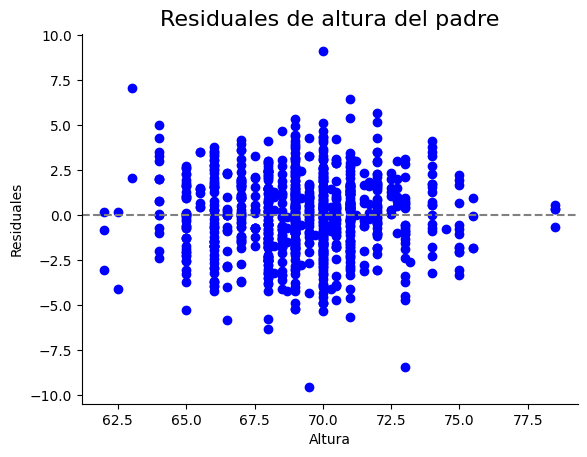

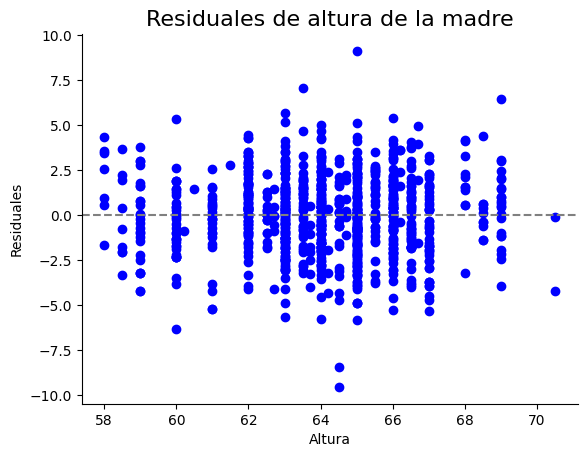

In [ ]:
x = df[["gender", "Father_height", "Mother_height"]]
y = df["Child_height"]


# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


#Expresión matemática
print(modelo_lineal.params,"\n")


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x["Father_height"], residuales, color = 'blue')
plt.xlabel('Altura')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de altura del padre", fontsize=16)

plt.figure()
plt.scatter(x["Mother_height"], residuales, color = 'blue')
plt.xlabel('Altura')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de altura de la madre", fontsize=16)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')


# 10. Realice la prueba de Breusch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# 11.
print(f'para x_1=1, x_2=69 y x_3=65 y = {modelo.predict([[1,1,69,65]])} altura estimada\n')
print(f'para x_1=0, x_2=69 y x_3=65 y = {modelo.predict([[1,0,69,65]])} altura estimada\n')


#12
from statsmodels.formula.api import ols
modelo_lineal = ols('Child_height ~ gender + Father_height + Mother_height', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

In [ ]:
#A partir de los datos disponibles, ¿qué relación parece existir entre la estatura del padre y la estatura del hijo o hija?
#La relación entre la estatura del padre y del hijo es de 0.27, lo que significa que hay una correlación positiva moderada en la que a mayor estatura del padre
#tiende a aumentar la estatura del hijo o hija pero de una manera no muy fuerte.

In [ ]:
#¿Qué tipo de relación observas entre la estatura de la madre y la estatura del hijo o hija?
#Se observa una relación positiva pero débil ya que es de 0.20 entre estas variables, lo que quiere decir que cuando aumenta la estatura de la madre
#también tiende a aumentar la estatura del hijo o hija, aunque la relación es más baja que la que existe con la estatura del padre esto nos indica
#que existen otros factores que influyen más en la estatura del hijo.

In [ ]:
#Analiza si existe alguna relación evidente entre la estatura del padre y la estatura de la madre.
#Es un coeficiente de correlación que está muy cercano a cero lo que nos indica que no hay una relación significativa o que esta es nula lo que nos quiere decir,
#que la altura del padre no depende de la altura de la madre.

In [ ]:
#Considerando las estaturas registradas, ¿cómo influye el género en la estatura del hijo o hija?
#El género tiene una influencia significativamente alta en la estatura del hijo o hija en donde se puede observar esto en la tabla ANOVA donde se obtuvo un valor-p muy menor al nivel de significancia lo que nos indica que
#si hay diferencia significativa ya que se rechazo la Hipótesis nula por lo que el género tiene un impacto significativo en la estatura del hijo o hija a comparación de la altura del padre o de la madre
#lo cual esto lo podemos observar en el estadístico F donde el del genero es mucho mayor a la altura de la madre y del padre.
#Por lo que además el como influye se puede observar en el mapa de calor donde la relación del género en la estatura del hij@ es positiva y fuerte donde su coeficiente de correlación es 0.72, por lo que esto nos indica que
#el género si influye en la altura de los hijos donde los hijos si tienden a ser más altos que las hijas.

In [ ]:
#Propón una expresión matemática que permita estimar la estatura del hijo o hija a partir de las estaturas de sus padres.
#Child_height= 16.5212 + 0.3928 F.H + 0.3176 M.H + 5.215 G

In [ ]:
 #Evalúa la utilidad práctica de la expresión obtenida en el inciso anterior para realizar estimaciones en otros casos.
 #La utilidad de la expresión que obtuvimos es que nos permite estimar la estatura esperada de un hijo o hija respecto a la altura de la madre o del padre
 #pero no lo podemos usar para predecir de manera exacta porque solo nos permite explicar el 63.5% de la variabilidad y respecto a esto influyen otros factores en la estimación de
 #la altura esperada de los hijos como la genética.

In [ ]:
#Si el padre mide 69 pulgadas y la madre 65 pulgadas, estima la estatura esperada del hijo y de la hija. Interpreta brevemente el resultado.
#para x_1=1, x_2=69 y x_3=65 y = [69.48707371] altura estimada

#para x_1=0, x_2=69 y x_3=65 y = [64.27208436] altura estimada

#Si el padre mide 69 pulgadas y la madre 65 pulgadas el hijo mediria aproximadamente 69.5 pulgadas y la hija mediría aproximadamente 64.3, lo que
#este modelo nos indica que los hijos suelen ser más altos que las hijas ya que conforme a este se espera que el hijo crezca 5.2 pulgadas más que las hijas
#lo que corresponde a que la estatura de los padres si influye pero la influencia que tiene el género en la estatura es más notable.

In [ ]:
#Examina los valores residuales del análisis anterior y comenta si observas algún patrón sistemático o irregularidad que deba considerarse.
#No se observa ningún patrón sistemático, lo cual se puede observar en el gráfico de residuales en el que este nos muestra linealidad, ya que las variables
#se pueden representar en una recta o línea imaginaria y los puntos están dispersos de una manera aleatoria pero se logra observar la falta de normalidad en el segundo gráfico ya que la mayoría de los puntos no tienden a centrarse
#en la línea del cero pero en el primero si tienden a hacerlo pero el test de shapiro nos indica que los residuales no cumplen con normalidad aunque estos se aproximen en los gráficos y el test de Breush Pagan nos indica que
#que hay homoscedasticidad aceptable ya que se obtuvo un valor-p de 0.069 y no se rechazo la Hipótesis nula ya que este es mayor al nivel de significancia de 0.05
#y en el gráfico se percibe de una manera en la que la varianza de los eerores es casi constante por lo que no se observa ninguna irregularidad.

In [ ]:
#¿Qué utilidad práctica tiene todo el análisis realizado? ¿A qué sectores podría ayudar y en qué forma? Da una respuesta extensa
#La útilidad práctica que tiene el análisis es importante ya que nos permite estimar la altura de los hijos en relación a la estatura de los padres y el genéro.A los sectores que podría ayudar
#son en los estudios que abarcan la genética ya que permitiría encontrar ciertos resultados como el estimar si existen condiciones que se transmiten
#por progenitores así como el predecir el crecimiento infantil y comprender como es que influyen los factores de estatura familiares. En el sector de medicina ayudaría
#a detectar variaciones normales y no normales en el crecimiento y desarrollo infantil; además este ayudaría a detectar si la falta de crecimiento o excesivo de este se debe o se relaciona a
#la nutrición y no solo con la genética. En sector deportivo permitiría identificar ciertas condiciones físicas heredadas que influyen en el rendimiento de la persona en el deporte y en el sector de educación
#nos ayudaría para orientar ciertos programas adecuados orientados a la educación física para detectar posibles problemas de crecimiento y comprender las diferencias entre la estatura de los alumnos
